We will be using "default of credit card clients Data Set" from UCI Machine learning repository.


## Imports

In [1]:
%load_ext autotime

In [72]:
import pandas as pd # Pandas for importing data and one hot encoding
import numpy as np # Data manipulation

import matplotlib.pyplot as plt # Plotting, drawing graphs
import matplotlib.colors as colors

from sklearn.utils import resample # downsample the dataset
from sklearn.model_selection import train_test_split # split data into train and test set
from sklearn.preprocessing import scale # scale and center data
from sklearn.svm import SVC # support vector classifier
from sklearn.model_selection import GridSearchCV # this will do cross validation
from sklearn.metrics import confusion_matrix # this creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # this plots the confusion matrix
from sklearn.decomposition import PCA # decompose and plot the data

from IPython.core.interactiveshell import InteractiveShell # Pretty display of variables
InteractiveShell.ast_node_interactivity = "all"

time: 2.02 ms


## Read the data

In [3]:
csv_path = "../data/svm/default of credit card clients.xls"

time: 872 µs


In [4]:
df = pd.read_excel(csv_path, header=1)

time: 5.28 s


In [5]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


time: 114 ms


In [6]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

time: 9.31 ms


ID - Id of the customer <br>
LIMIT_BAL - Credit limit of the customer <br>
SEX - Male(1) / Female(2) <br>
EDUCATION - education (1 = graduate school; 2 = university; 3 = high school; 4 = others) <br>
MARRIAGE - Marital status (1 = married; 2 = single; 3 = others) <br>
AGE - Age (year) <br>
PAY_0 to PAY_6 - History of past payment. We tracked the past monthly payment records (from April to September, 2005), The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. <br>
BILL_AMT1 to BILL_AMT6 - Amount of bill statement (NT dollar).<br>
PAY_AMT1 to PAY_AMT6 - Amount of previous payment (NT dollar).<br>
default payment next month - Prediction

In [7]:
df.rename({"default payment next month" : "DEFAULT"}, axis='columns', inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


time: 208 ms


In [8]:
df.drop("ID", axis=1, inplace=True) # axis = 0 for rows and axis = 1 for columns!
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


time: 131 ms


## Handle Missing values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_0      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [10]:
df.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
DEFAULT      int64
dtype: object

time: 34.5 ms


This means, NA is not present in any column. But, we should check if they have acceptable values

In [11]:
df["SEX"].unique() # should have only 1/2

array([2, 1])

time: 101 ms


Sex looks good!

Education should have values from 1 to 4, but we see there are extra values - 0, 5, 6 

In [12]:
df["EDUCATION"].unique() 

array([2, 1, 3, 5, 4, 6, 0])

time: 247 ms


In [13]:
df.loc[(df["MARRIAGE"] == 0) | (df["EDUCATION"] == 0)]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
218,110000,2,3,0,31,0,0,0,0,0,...,73315,63818,63208,4000,5000,3000,3000,3000,8954,0
809,160000,2,2,0,37,0,0,0,0,0,...,28574,27268,28021,35888,1325,891,1000,1098,426,0
820,200000,2,3,0,51,-1,-1,-1,-1,0,...,780,390,390,0,390,780,0,390,390,0
1019,180000,2,3,0,45,-1,-1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
1443,200000,1,3,0,51,-1,-1,-1,-1,0,...,2529,1036,4430,5020,9236,2529,0,4430,6398,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28602,200000,2,3,0,37,1,-1,-1,-1,-1,...,4000,22800,5716,35000,5000,4000,22800,5716,0,0
28603,110000,2,3,0,44,2,2,2,2,2,...,41476,42090,43059,2000,2000,1700,1600,1800,1800,1
28766,80000,2,3,0,40,2,2,3,2,-1,...,1375,779,5889,5000,0,0,885,5889,4239,0
29078,100000,2,3,0,56,1,2,0,0,2,...,31134,30444,32460,0,1500,2700,0,2400,0,0


time: 313 ms


Its just 14 rows in dataset with 30k rows. Lets remove them!

In [14]:
df_no_missing = df.loc[(df["MARRIAGE"] != 0) & (df["EDUCATION"] != 0)]

time: 13.7 ms


In [15]:
len(df_no_missing)

29932

time: 92.1 ms


In [16]:
df_no_missing["MARRIAGE"].unique()

array([1, 2, 3])

time: 134 ms


In [17]:
df_no_missing["EDUCATION"].unique()

array([2, 1, 3, 5, 4, 6])

time: 92.6 ms


## Downsampling the data

SVM are great with small datasets, but not awesome with large datasets. The dataset is huge for cross validation. Hence we downsample both categories - Customers who did and did not default to 1000 each. <br>
Lets break the dataset into two categories - one who did default and one who did not

In [18]:
df_no_default = df_no_missing.loc[df_no_missing["DEFAULT"] == 0]
print(f"Number of entries for no defaulters is {len(df_no_default)}")
df_no_default.head()

Number of entries for no defaulters is 23301


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0


time: 120 ms


In [19]:
df_default = df_no_missing.loc[df_no_missing["DEFAULT"] == 1]
print(f"Number of entries for defaulters is {len(df_default)}")
df_default.head()

Number of entries for defaulters is 6631


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
13,70000,1,2,2,30,1,2,2,0,0,...,66782,36137,36894,3200,0,3000,3000,1500,0,1
16,20000,1,1,2,24,0,0,2,2,2,...,18338,17905,19104,3200,0,1500,0,1650,0,1
21,120000,2,2,1,39,-1,-1,-1,-1,-1,...,0,632,316,316,316,0,632,316,0,1


time: 148 ms


In [20]:
df_no_default_downsampled = resample(df_no_default, 
                                    replace=False,
                                    n_samples=1000,
                                    random_state=42)
len(df_no_default_downsampled)

1000

time: 198 ms


In [21]:
df_default_downsampled = resample(df_default,
                                 replace=False,
                                 n_samples=1000,
                                 random_state=42)
len(df_default_downsampled)

1000

time: 144 ms


Now lets merge these two dataframes into a single dataframe!

In [22]:
df_downsample = pd.concat([df_no_default_downsampled, df_default_downsampled])
len(df_downsample)

2000

time: 68.5 ms


## Format data - split the data into Dependent and Independent variables

The first step is to split the data into two parts: <br>
1. The columns that we will use to do the classification. <br>
2. The columns of data that wewant to predict. <br>

We will use conventional notations **X** to represent columns which we use to do the classification and **y** to represent target column

In [23]:
X = df_downsample.drop("DEFAULT", axis=1).copy()
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
641,130000,2,3,1,28,0,0,0,0,-2,...,50000,0,0,0,2500,1000,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,...,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300
16004,180000,2,2,1,29,0,0,0,0,0,...,26310,26662,26166,26176,1800,1800,1500,1056,950,1000
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,...,410,0,0,0,979,412,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,...,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000


time: 85.2 ms


In [24]:
y = df_downsample["DEFAULT"].copy()
y.head()

641      0
4678     0
16004    0
22974    0
17535    0
Name: DEFAULT, dtype: int64

time: 149 ms


## Fomatting the input data columns

It looks like **SEX**, **MARRIAGE**, **EDCUATION** and **PAY_** are categorical variables and need to be modified. This is because, **sklearn SVM** natively supports continous data like **LIMIT_BAL** and **AGE**. But they do not natively support categorical data. We have to use a trick to convert categorical data into multiple columns of binary data. This is called as **One hot encoding**

In [25]:
pd.get_dummies(X, columns=["MARRIAGE"])
pd.get_dummies(X, columns=["MARRIAGE"]).columns

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
641,130000,2,3,28,0,0,0,0,-2,-2,...,0,2500,1000,0,0,0,0,1,0,0
4678,170000,1,3,29,0,0,0,0,0,0,...,33862,7200,7500,1200,1200,1500,1300,1,0,0
16004,180000,2,2,29,0,0,0,0,0,0,...,26176,1800,1800,1500,1056,950,1000,1,0,0
22974,210000,2,2,32,-2,-2,-2,-2,-2,-2,...,0,979,412,0,0,0,0,0,1,0
17535,190000,2,3,45,0,0,0,0,0,0,...,84811,3300,3331,3359,2663,2751,3000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6154,30000,2,1,34,1,2,2,2,2,2,...,25413,1396,0,1967,903,0,1100,0,1,0
14072,320000,1,1,43,-1,0,0,0,0,0,...,-45,10000,5000,0,0,0,0,1,0,0
5387,50000,1,2,23,-1,-1,0,0,-1,-1,...,0,15000,20300,9500,1420,0,0,0,1,0
23192,150000,2,3,43,0,0,0,0,0,0,...,22922,1973,1353,1366,802,833,837,1,0,0


Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'MARRIAGE_1',
       'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')

time: 216 ms


As we can see its getting encoded now. And we do not have marriage column now.

In [26]:
X_encoded = pd.get_dummies(X, columns=[
                                        "SEX",
                                        "MARRIAGE",
                                        "EDUCATION",
                                        "PAY_0",
                                        "PAY_2",
                                        "PAY_3",
                                        "PAY_4",
                                        "PAY_5",
                                        "PAY_6"
])

X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
641,130000,28,100143,50456,50000,0,0,0,2500,1000,...,0,1,0,0,0,0,0,0,0,0
4678,170000,29,165027,168990,172307,35234,32869,33862,7200,7500,...,0,0,0,1,0,0,0,0,0,0
16004,180000,29,25781,26000,26310,26662,26166,26176,1800,1800,...,0,0,0,1,0,0,0,0,0,0
22974,210000,32,355,975,410,0,0,0,979,412,...,0,1,0,0,0,0,0,0,0,0
17535,190000,45,76433,78472,80548,81778,83082,84811,3300,3331,...,0,0,0,1,0,0,0,0,0,0


time: 102 ms


## Centering and Scaling

**RBF** that we are using with **SVM** assumes that the data is centered and scaled. Meaning, each column should have a mean value of 0 and a standard deviation of 1. We need to do this to both training and testing datasets. <br>
We split the data into training and testing datasets and then scale them separately to avoid data leakage. This occurs when the information about the training dataset corrupts or influence the testing dataset. <br>

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

time: 41.7 ms


In [28]:
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

time: 95.9 ms


## Build a preliminary SVM

In [29]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

time: 448 ms


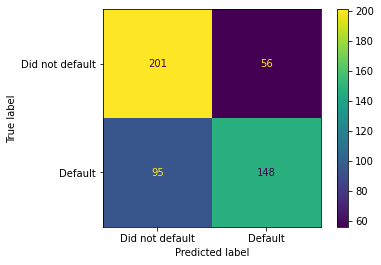

time: 670 ms


In [30]:
plot_confusion_matrix(clf_svm,
                     X_test_scaled,
                     y_test,
                     values_format="d",
                     display_labels=["Did not default", "Default"])

We can see that out of **257** people who haven't defaulted, **201** people are correctly classified - **78.2%** <br>
We can see that out of **243** people who have defaulted, **148** people are correctly classified - **60.9%** <br>

Lets use **cross validation** to improve to optimize parameters and increase the classification accuracy!

## Optimize parameters with cross validation and GridSearchCV()

In [31]:
param_grid = [
    {
        "C": [0.5, 1, 10, 100, 1000],
        "gamma": ["scale", 1, 0.1, 0.01, 0.001, 0.0001],
        "kernel": ["rbf"]
    }
]
# We are including C=1 and gamma=scale because they are default parameters

time: 1.55 ms


In [32]:
optimal_params = GridSearchCV(SVC(),
                              param_grid,
                              cv=5,
                              scoring='accuracy',
                              verbose=0)

optimal_params.fit(X_train_scaled, y_train)
optimal_params.best_params_

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.5, 1, 10, 100, 1000],
                          'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='accuracy')

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

time: 40.4 s


## Building, Evaluating, Drawing and Interpreting the final Support Vector Machine 

In [33]:
clf_svm = SVC(random_state=42, C=100, gamma=0.001, kernel="rbf")
clf_svm.fit(X_train_scaled, y_train)

SVC(C=100, gamma=0.001, random_state=42)

time: 273 ms


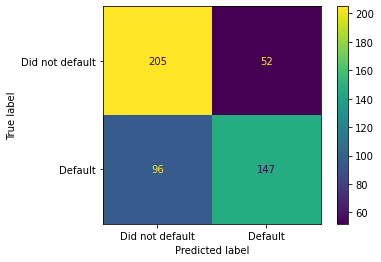

time: 284 ms


In [34]:
plot_confusion_matrix(clf_svm,
                     X_test_scaled,
                     y_test,
                     values_format='d',
                     display_labels=["Did not default", "Default"])

We can see that out of **257** people who haven't defaulted, **205** people are correctly classified - **79.7%** <br>
We can see that out of **243** people who have defaulted, **147** people are correctly classified - **60.4%** <br>

In other words, SVMs are good out of the box! And works best with small datasets

## Reduce dimensionality of the data!

In [35]:
len(df_downsample.columns)

24

time: 3.99 ms


There are 24 columns in the data, we need two columns to plot this data.<br>
So, we use **PCA** to reduce the dimensions. It would combine 24 features into 2 orthogonal meta features. which we can use as axes in the graphs.<br>

First lets see how accurate the shrunken graph is, if its relatively accurate, then it makes sense to shrink the dimensions. We can find accuracy of the drawing by plotting something called as **scree plot**

In [36]:
pca = PCA(random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)

time: 257 ms


In [46]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1) # This gives all the variances of latent features
labels = [str(x) for x in range(1, len(per_var) + 1)]

time: 1.14 ms


<BarContainer object of 81 artists>

Text(0.5, 0, 'Principal Components')

Text(0, 0.5, 'Percentage of explained variable')

Text(0.5, 1.0, 'Scree plot')

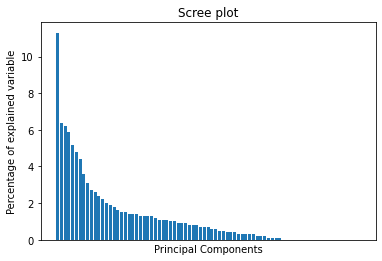

time: 466 ms


In [49]:
plt.bar(x=range(1, len(per_var) + 1), height=per_var)
plt.tick_params(
                axis='x',
                which='both',
                bottom=False,
                top=False,
                labelbottom=False
)

plt.xlabel("Principal Components")
plt.ylabel("Percentage of explained variable")
plt.title("Scree plot")
plt.show()

The scree plot shows that, the first principal component PC1 accounts for a relatively large amount of variation in raw data, and this means this would be a very good candidate for x-axis in 2 dimensional data. However PC2 is very much near to PC3 and PC4, which does not do well with dimensionality reduction.

In [50]:
train_pc1_coords = X_train_pca[:, 0]
train_pc2_coords = X_train_pca[:, 1]

# PC1 contains x axis co ordinates of the data after PCA
# PC2 contains y axis co ordinates of the data after PCA

# center and scale the columns
pca_train_scaled = scale(np.column_stack((train_pc1_coords, train_pc2_coords)))

# Now we optimize SVM fit to x and y axis co ordinates using cross validation
param_grid = [
    {
        "C": [1, 10, 100, 1000],
        "gamma": ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
        "kernel": ["rbf"]
    }
]

optimal_params = GridSearchCV(
                              SVC(),
                              param_grid,
                              cv=5,
                              scoring="accuracy",
                              verbose=0)

optimal_params.fit(pca_train_scaled, y_train)
optimal_params.best_params_

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='accuracy')

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

time: 28.3 s


Now as we have new optimised values for C and Gamma, lets draw the graph

In [51]:
clf_svm = SVC(random_state=42, C=1000, gamma=0.001)
clf_svm.fit(pca_train_scaled, y_train)

SVC(C=1000, gamma=0.001, random_state=42)

time: 168 ms


Lets transform the test data with PCA

In [52]:
X_test_pca = pca.transform(X_test_scaled)
test_pc1_coords = X_test_pca[:,0]
test_pc2_coords = X_test_pca[:,1]

time: 18.4 ms


Now create a matrix of points that we can use to show the decision boundaries. The matrix would be little bit larger than the transformed pca points so that we can plot all the pca points on it without them being on the edge.

In [53]:
x_min = test_pc1_coords.min() - 1
x_max = test_pc1_coords.max() + 1

y_min = test_pc2_coords.min() - 1
y_max = test_pc2_coords.max() + 1

time: 1.65 ms


numpy meshgrid : Return coordinate matrices from coordinate vectors.

Make N-D coordinate arrays for vectorized evaluations of N-D scalar/vector fields over N-D grids, given one-dimensional coordinate arrays x1, x2,…, xn.

In [55]:
xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                    np.arange(start=y_min, stop=y_max, step=0.1))

time: 2.05 ms


Now we will classify every point in the matrix into two categories. Points on one side of the classification boundary will get 0 and the other side will get 1.

In [59]:
Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))
Z = Z.reshape(xx.shape)

time: 848 ms


Now we will create a contour plot using matrix values and classifications

Text(0, 0.5, 'PC2')

Text(0.5, 0, 'PC1')

Text(0.5, 1.0, 'Decision boundary on PCA transformed / projected features')

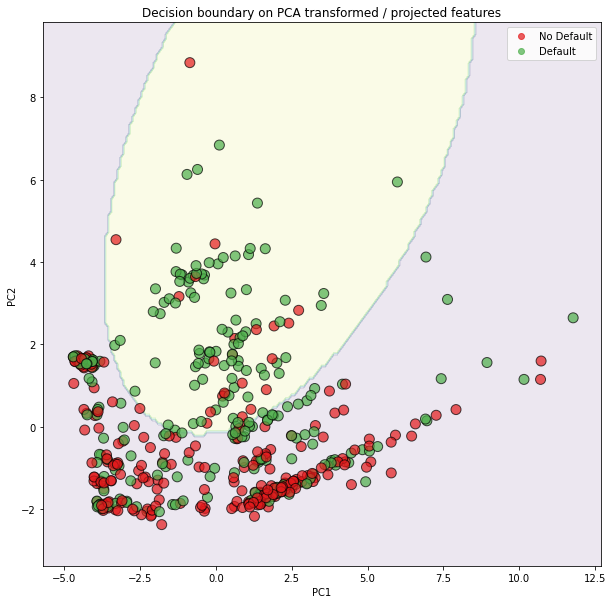

time: 315 ms


In [71]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.contourf(xx, yy, Z, alpha=0.1)

cmap = colors.ListedColormap(["#e41a1c", "#4daf4a"]) # Define color maps for data points

# Now draw actual datapoints, these will be covered by the class they have been classified into
scatter = ax.scatter(test_pc1_coords, 
                     test_pc2_coords,
                     c=y_test,
                     cmap=cmap, 
                     s=100,
                     edgecolors='k',
                     alpha=0.7)

# Now create the legend
legend = ax.legend(scatter.legend_elements()[0],
                  scatter.legend_elements()[1],
                  loc="upper right")
legend.get_texts()[0].set_text("No Default")
legend.get_texts()[1].set_text("Default")

# Add axis labels and titles
ax.set_ylabel("PC2")
ax.set_xlabel("PC1")
ax.set_title("Decision boundary on PCA transformed / projected features")
plt.show()